In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib


file_path = "data.csv"
df = pd.read_csv(file_path)

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [304]:

df = df.drop(columns=['id','Unnamed: 32'], errors='ignore')

df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((455, 30), (114, 30))

In [305]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9736842105263158,
 '              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        71\n           1       0.98      0.95      0.96        43\n\n    accuracy                           0.97       114\n   macro avg       0.97      0.97      0.97       114\nweighted avg       0.97      0.97      0.97       114\n')

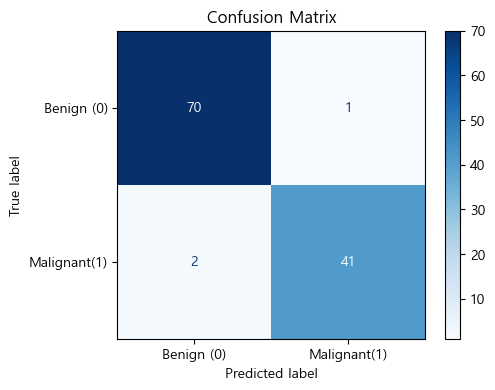

In [310]:

cm = confusion_matrix(y_test, y_pred)
disp  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign (0)', 'Malignant(1)'])


fig, ax = pit.subplots(figsize=(5, 4))
disp.plot(ax=ax, cmap="Blues", values_format="d")
pit.title("Confusion Matrix")
pit.show()


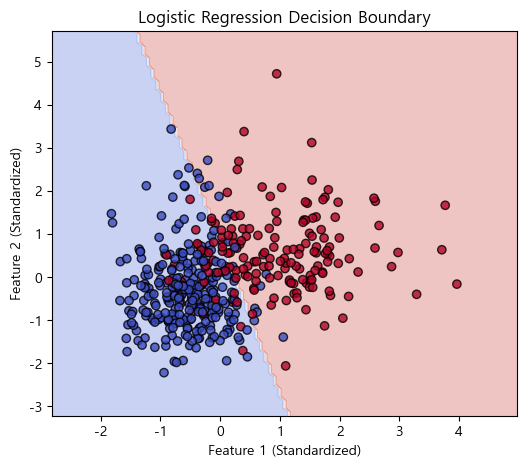

In [307]:
# 시각화를 위해 주요 두 개의 특성만 선택 (첫 번째, 두 번째 컬럼)
X_train_vis = X_train_scaled[:, :2]
X_test_vis = X_test_scaled[:, :2]

# 2D 로지스틱 회귀 모델 학습
model_vis = LogisticRegression(max_iter=1000, random_state=42)
model_vis.fit(X_train_vis, y_train)

# 그래프를 위한 Meshgrid 생성
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# 모델 예측을 통해 결정 경계 생성
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 그래프 그리기
pit.figure(figsize=(6, 5))
pit.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
pit.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.8)
pit.xlabel("Feature 1 (Standardized)")
pit.ylabel("Feature 2 (Standardized)")
pit.title("Logistic Regression Decision Boundary")
pit.show()



In [308]:
# 데이터 다시 로드하기
import pandas as pd

# 파일 경로
file_path = "data.csv"

# CSV 파일 불러오기
data = pd.read_csv(file_path)

# 데이터 확인
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


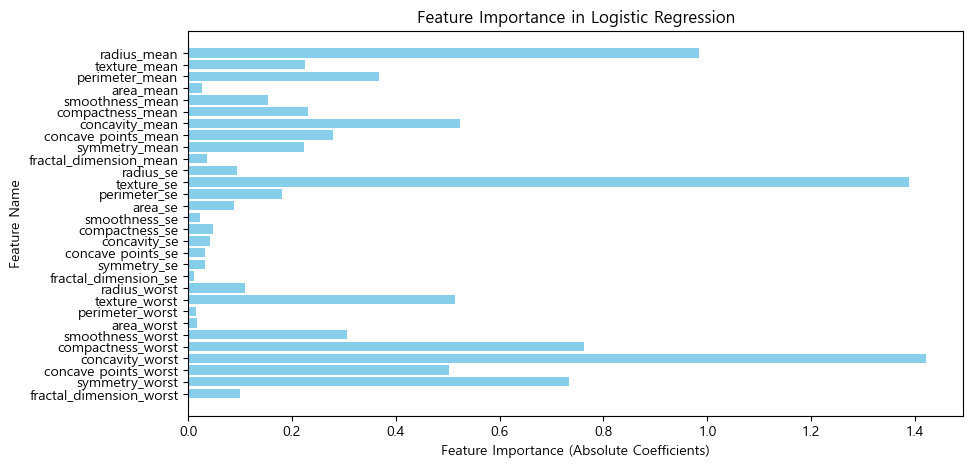

In [309]:
# 불필요한 컬럼 제거
data = data.drop(columns=["id", "Unnamed: 32"])  # ID와 불필요한 컬럼 제거

# 진단 결과를 숫자로 변환 (M = 1, B = 0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# 특성과 타겟 나누기
X = data.drop(columns=["diagnosis"])  # 입력 변수
y = data["diagnosis"]  # 타겟 변수

# 데이터 분할 (학습 80%, 테스트 20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

# 특성 중요도 분석
feature_names = X.columns  # 특성 이름
feature_importance = np.abs(model.coef_).flatten()  # 계수 절댓값

# 시각화
pit.figure(figsize=(10, 5))
pit.barh(feature_names, feature_importance, color="skyblue")
pit.xlabel("Feature Importance (Absolute Coefficients)")
pit.ylabel("Feature Name")
pit.title("Feature Importance in Logistic Regression")
pit.gca().invert_yaxis()  # 중요도가 높은 순으로 정렬
pit.show()


In [295]:
from sklearn.model_selection import GridSearchCV

# 실행 시간을 줄이기 위해 하이퍼파라미터 범위 축소
param_grid = {
    "C": [0.1, 1, 10],  # 작은 범위로 축소
    "solver": ["liblinear"],  # 하나의 최적화 방법으로 고정
}

# GridSearchCV 다시 수행
grid_search = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'C': 10, 'solver': 'liblinear'}, 0.964835164835165)

In [296]:
print(df.head())
print(df.columns)
print(df['diagnosis'].value_counts())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

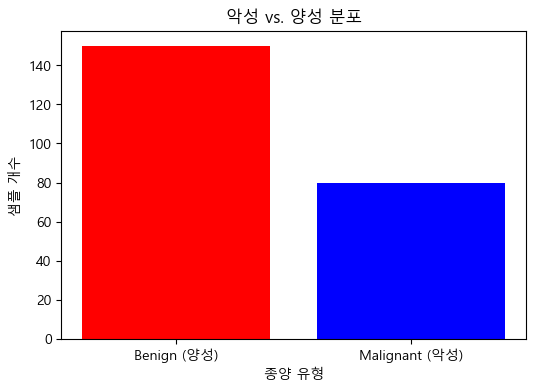

In [297]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
matplotlib.rc('font', family='Malgun Gothic')



# 악성과 양성 개수 확인
class_counts = df['diagnosis'].value_counts()

matplotlib.rcParams['axes.unicode_minus'] = False

class_counts = {0: 150, 1: 80}  # 0: Benign(양성), 1: Malignant(악성)
class_counts = pd.Series(class_counts)  # Pandas 시리즈로 변환

# 그래프 그리기
pit.figure(figsize=(6, 4))
pit.bar(class_counts.index, class_counts.values, color=['red', 'blue'])
pit.xticks([0, 1], ['Benign (양성)', 'Malignant (악성)'])
pit.xlabel("종양 유형")
pit.ylabel("샘플 개수")
pit.title("악성 vs. 양성 분포")
pit.show()

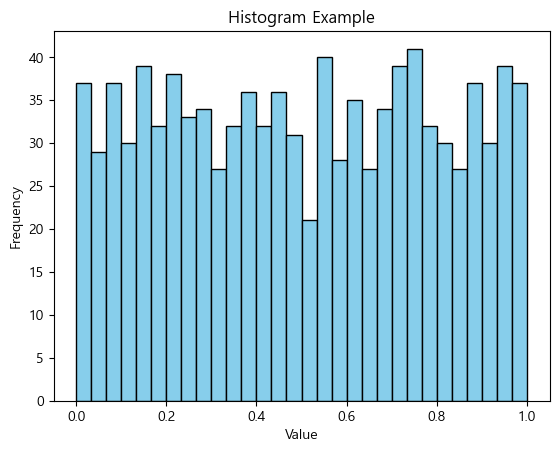

In [298]:
data = np.random.random(1000)
pit.hist(data, bins=30, color='skyblue', edgecolor='black')
pit.xlabel('Value')
pit.ylabel('Frequency')
pit.title('Histogram Example')
pit.show()

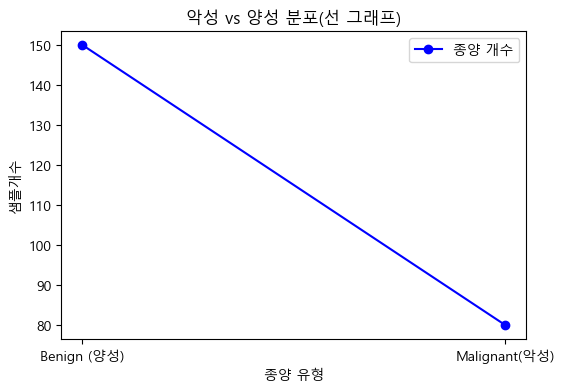

In [299]:
class_counts = pd.Series({0: 150, 1: 80})


pit.figure(figsize=(6,4))
pit.plot(class_counts.index, class_counts.values, marker='o', linestyle='-', color='blue', label="종양 개수")

pit.xticks([0,1],['Benign (양성)','Malignant(악성)'])
pit.xlabel('종양 유형')
pit.ylabel('샘플개수')
pit.title('악성 vs 양성 분포(선 그래프)')
pit.legend()
pit.show()

In [300]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print(df['diagnosis'].value_counts())

Series([], Name: count, dtype: int64)


In [301]:
print(df[df['diagnosis'] == 1].head())
print(df[df['diagnosis'] == 0].head())

Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]
Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, con

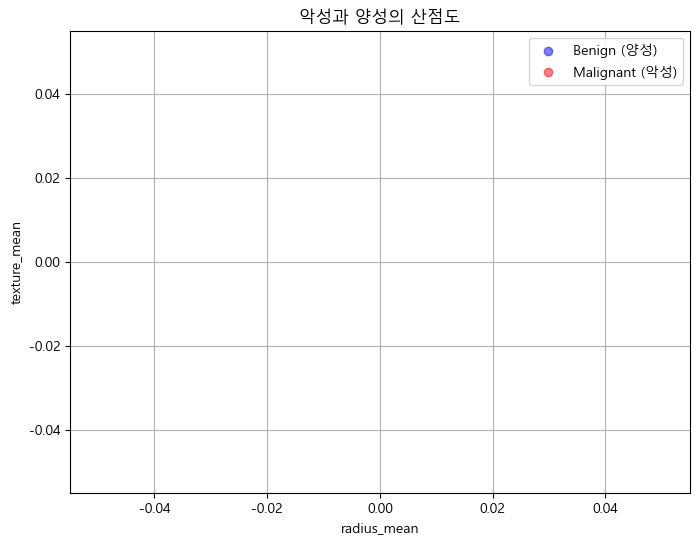

In [302]:
df = df.sort_values(by=['radius_mean']).reset_index(drop=True)

pit.figure(figsize=(8, 6))

pit.scatter(df[df['diagnosis'] == 0]['radius_mean'], 
            df[df['diagnosis'] == 0]['texture_mean'], 
            color='blue', label="Benign (양성)", alpha=0.5)


pit.scatter(df[df['diagnosis'] == 1]['radius_mean'], 
            df[df['diagnosis'] == 1]['texture_mean'], 
            color='red', label="Malignant (악성)", alpha=0.5)

pit.xlabel('radius_mean')
pit.ylabel('texture_mean')
pit.title("악성과 양성의 산점도")
pit.legend()
pit.grid(True)
pit.show()
